<a href="https://colab.research.google.com/github/allanspadini/livro-val-allan/blob/main/capitulo1/capitulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = 'https://github.com/allanspadini/livro-val-allan/raw/main/GlobalLandTemperaturesByCountry.csv'

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv(url)

In [ ]:
dados.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [ ]:
dados.columns = ['Data', 'Temperatura', 'Incerteza', 'País']

In [ ]:
dados.head()

,Data,Temperatura,Incerteza,País
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
dados['Data'].max()

'2013-09-01'

In [ ]:
dados_br = dados.query('País == "Brazil"')

In [ ]:
dados_nulos = dados_br.isnull().sum()
dados_nulos

Data            0
Temperatura    17
Incerteza      17
País            0
dtype: int64

In [ ]:
dados_br.dropna(inplace=True)

In [ ]:
dados_br['Temperatura'].describe()

count    2164.000000
mean       24.699256
std         0.978787
min        21.797000
25%        24.022500
50%        24.829500
75%        25.449750
max        27.151000
Name: Temperatura, dtype: float64

In [ ]:
import seaborn as sns

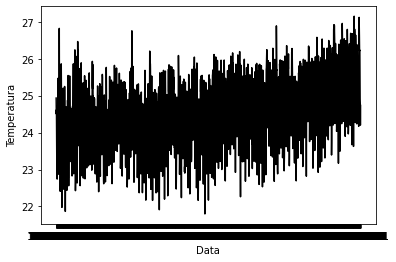

In [ ]:
sns.lineplot(x='Data', y='Temperatura', data=dados_br, color='black')

In [ ]:
dados_br['Data'] = pd.to_datetime(dados_br['Data'], format='%Y-%m-%d')

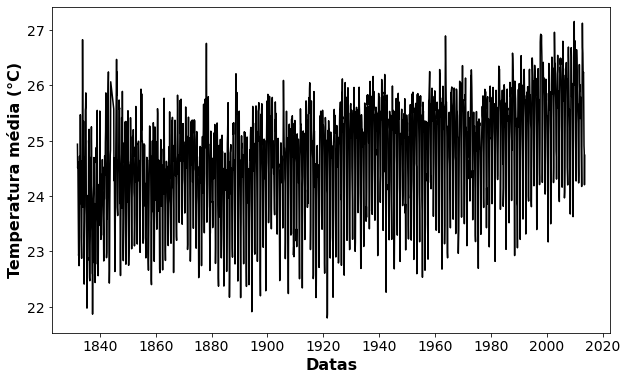

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6)) #Ajuste do tamanho da imagem
plt.rcParams['font.size'] = '14' # Ajuste do tamanho da fonte
sns.lineplot(x='Data', y='Temperatura', data=dados_br, color='black')
plt.xlabel('Datas', weight = 'bold', fontsize=16) # Nome do eixo x
plt.ylabel('Temperatura média (°C)', weight = 'bold', fontsize=16) # Nome do eixo y
plt.show()

In [ ]:
dados_br['Mês'] = pd.DatetimeIndex(dados_br['Data']).month

In [ ]:
dados_br

,Data,Temperatura,Incerteza,País,Mês
77110,1832-01-01,24.935,1.372,Brazil,1
77111,1832-02-01,24.505,1.953,Brazil,2
77112,1832-03-01,24.617,1.359,Brazil,3
77113,1832-04-01,23.990,2.013,Brazil,4
77114,1832-05-01,23.124,1.592,Brazil,5
...,...,...,...,...,...
79285,2013-04-01,25.464,0.253,Brazil,4
79286,2013-05-01,24.906,0.236,Brazil,5
79287,2013-06-01,24.788,0.251,Brazil,6
79288,2013-07-01,24.202,0.201,Brazil,7


In [ ]:
temperatura = dados_br.groupby(['Mês']).mean()

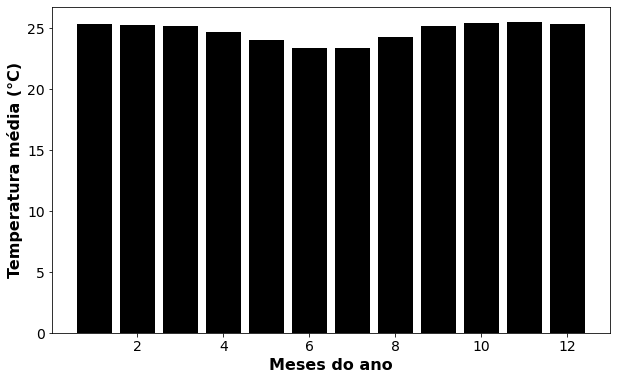

In [ ]:
plt.figure(figsize=(10,6)) 
plt.rcParams['font.size'] = '14'
plt.bar(temperatura.index, temperatura['Temperatura'].values, color='black')
plt.xlabel('Meses do ano', weight = 'bold', fontsize=16) 
plt.ylabel('Temperatura média (°C)', weight = 'bold', fontsize=16)
plt.show()

In [ ]:
media_movel = dados_br['Temperatura'].rolling(30).mean()

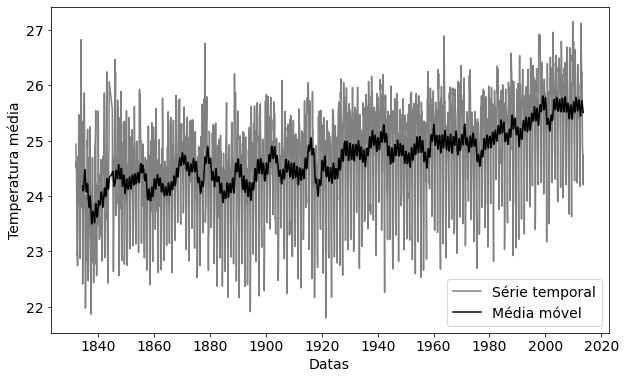

In [ ]:
plt.figure(figsize=(10,6))
plt.rcParams['font.size'] = '14'

sns.lineplot(x='Data', y='Temperatura', data=dados_br, color='gray')
plt.xlabel('Datas')
plt.ylabel('Temperatura média')


sns.lineplot(x='Data', y=media_movel, data=dados_br, color='black')
plt.legend(labels=['Série temporal', 'Média móvel'])
plt.show()